## COMP SCI 7327 Concepts in Artificial Intelligence and Machine Learning -- Assignment 1



# Task 1： Explain the basic concepts (5 marks)

1. ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Please explain how the ROC curve works in the binary classification (1 mark).

2. Please describe what is cross-entropy and under what circumstances cross-entropy can be used (2 marks)?

4. Please explain what are the similarities and differences of L1 loss and MSE loss in K-Nearest Neighbor training (2 marks)?



1. ROC curves show the trade off between false-positives and false-negatives of a classification model as a function of varying the discrimination threshold.
2. Cross entropy. Surprise is the inverse of probability. Surprise is the log inverse of the probability of an event. Entropy is the expected value of the surprise.
3. L1 loss and MSE loss

# Task 2 ：Python programming (8 marks)

1. Given a list of numbers: num=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], write python code that finds all odd numbers in a list and returns a new list that contains all the odd numbers (2 marks).

In [21]:
def print_odd_num(numbers):
    odd_numbers = [num for num in numbers if num % 2 > 0]
    return odd_numbers

2. The “carry” means if the summation of one digital position is greater than 10, an another 1 will be added to the next position. Please write python code to count the number of the “carry” operations. For example, 123+456 has no "carry" as neither of 3+6，2+5, 1+4 is greater than 10. Some other examples are as below (3 marks):

> **Example 1:**

> Input: 
> 123+456

> Output:
> No carry operation.

> **Example 2:**

> Input: 
> 555+555

> Output:
> 3 carry operations.

> **Example 3:**

> Input: 
> 123+594

> Output:
> 1 carry operation.


In [1]:
def countCarries(number_a: int, number_b: int) -> int:
    """Count the carries.
    
    Args:
        number_a (int) 
        number_b (int) 
    Returns:
        num_carries (int)

    Assumptions:
    1. Addition only.
    2. Negative numbers excluded.
    """
    num_carries = 0
    number_c = number_a + number_b

    digits_a = [int(a) for a in str(abs(number_a))]
    digits_b = [int(b) for b in str(abs(number_b))]
    digits_c = [int(c) for c in str(abs(number_c))]

    digits_a.reverse()
    digits_b.reverse()
    digits_c.reverse()

    num_least_digits = min(len(digits_a), len(digits_b))

    for i in range(num_least_digits):
        if digits_c[i] < digits_b[i] + digits_a[i]:
            num_carries += 1

    return num_carries

3. Roman numerals are represented by seven different symbols: I (=1) , V (=5), X(=10), L (=50), C(=100), D (=500) and M(=1000). For example, 2 is written as 'II' in Roman numeral, just two 'I' added together. The number 27 is written as XXVII, which is XX + V + II. Your task is to write a Python code that recognizes the roman numbers. The input and output should be in the format as shown below (3 marks):

>**Example 1:**

>Input: s = "III"

>Output: 3

>**Example 2:**

>Input: s = "LVIII"

>Output: 58

>**Example 3:**

>Input: s = "MCMXCIV"

>Output: 1994


In [1]:
import math


def convert_to_numbers(roman_string: str) -> int:
    """Convert roman numerals to numbers.

    Args:
        roman_string (string) 

    Returns:
        number (int)
    """
    rome2num = {'I': 1, 'V': 5, 'X': 10,
                'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    sum = 0
    previous_num = math.inf

    for index, char in enumerate(roman_string):
        current_num = rome2num[char]
        if previous_num < current_num:
            sum -= 2*previous_num
            sum += current_num
        else:
            sum += current_num
            previous_num = current_num

    return sum


# Task 3 : Algorithm Programming (7 marks)

1. Download the MNIST dataset and split the dataset into a training set (70% of the data), validation set (10% of the data) and testing set (20% of the data) (1 Mark).

2. Build a classifier with three convolutional layers with pyTorch 1.2.0 (cpu version) (2 Marks).

3. Successfully train the classifier and record the accuracy on the testing set. Please note that you will need to use all the three subsets you got in 1. (2 Marks).
4. Please draw the loss curves and accuracy curves for both the training and validation set. You have to use Matplotlib to draw the figure.(2 Marks).








In [15]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Get MNIST via sklearn
X, y = datasets.fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
# X is the data set and y are its labels. If return_X_y=False, then type is sklearn 'Bunch', an extension of dictionaries.

# Split the data
X_train, X_delta, y_train, y_delta = train_test_split(X, y, train_size= 0.7, test_size=0.3)
X_validation, X_test, y_validation, y_test = train_test_split(X_delta, y_delta, train_size= 1/3, test_size=2/3)

# Demonstrate that the dataset has been split: 70% training, 10% validation, 20% training
print(f'validation_set: {len(X_validation)}, test_set: {len(X_test)}, training_set: {len(X_train)}')
print(f'validation_set: {len(X_validation)/len(X)}, test_set: {len(X_test)/len(X)}, training_set: {len(X_train)/len(X)}')

In [31]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision import datasets

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

# Concatenate MNIST training and test set
all_data = torch.utils.data.ConcatDataset([train_data, test_data])
print(f'There is now {len(all_data)} data instances in all_data.')

# Recut all_data: 70% training, 20% test, 10% validation.
# Lesson leartn: can't naively slice pytorch data class. Use Subset method.
idx_train = int(len(all_data)*0.7)
idx_test = idx_train + int(len(all_data)*0.2)
idx_validation = len(all_data)

train_indices = list(range(0, idx_train))
train_data_resliced = torch.utils.data.Subset(all_data, train_indices)
print(f'There is now {len(train_data_resliced)} data instances in train_data_resliced (70% of all_data).')

test_indices = list(range(idx_train, idx_test))
test_data_resliced = torch.utils.data.Subset(all_data, test_indices)
print(f'There is now {len(test_data_resliced)} data instances in test_data_resliced (20% of all_data).')

validation_indices = list(range(idx_test, idx_validation))
validation_data = torch.utils.data.Subset(all_data, validation_indices)
print(f'There is now {len(validation_data)} data instances in validation_data (10% of all_data).')

There is now 70000 data instances in all_data.
There is now 49000 data instances in train_data_resliced (70% of all_data).
There is now 14000 data instances in test_data_resliced (20% of all_data).
There is now 7000 data instances in validation_data (10% of all_data).


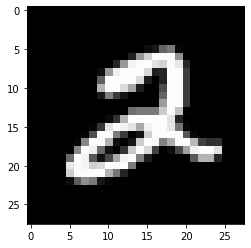

In [63]:
# Plot an instance of the data
plt.imshow(train_data[5][0][0], cmap='gray')

In [114]:
from torch import nn

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define models
class NeuralNetworkLinear(nn.Module):
    def __init__(self):
        super(NeuralNetworkLinear, self).__init__()
        self.flatten = nn.Flatten() # converts 2D arrays into one contiguous array.
        self.linear_relu_stack = nn.Sequential( 
            nn.Linear(28*28, 64), # args for CNN: input channels, output channels, kernel_size
            nn.ReLU(), # an activation layer that introduces non-linearities to the linear model
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


def create_CNN_model():
    model.model = nn.Sequential(

        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),

        nn.Conv2d(6, 16, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),

        nn.Conv2d(6, 16, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),

        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

Using cpu device


In [115]:
# Load data into Pytorch loader
train_loader = DataLoader(train_data_resliced, batch_size=32)
validation_loader = DataLoader(validation_data, batch_size=32)
test_loader = DataLoader(test_data_resliced, batch_size=32)

In [116]:
from torch import optim

# Assign model
model = create_CNN_model()

# Define optimiser
optimiser = optim.SGD(model.parameters(), lr=1e-2)

# Define loss function
loss_function = nn.CrossEntropyLoss() # This defines how the optimiser changes the NN parameters

print(model)

NeuralNetworkLinear(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten()
    (10): Linear(in_features=400, out_features=120, bias=True)
    (11): ReLU()
    (12): Linear(in_features=120, out_features=84, bias=True)

In [117]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return float(correct*100./total)

In [118]:
# Train the model and validation loops

# References used
# Pytorch: Quickstart: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
# PyTorch Lightning: https://www.youtube.com/watch?v=OMDn66kM9Qc&ab_channel=PyTorchLightning
# Krishna Ramesh: https://www.youtube.com/watch?v=ijaT8HuCtIY&ab_channel=KrishnaRamesh 

import copy

# Train the model
num_epochs = 5
max_accuracy = 0
losses = list()
accuracies = list()
size = len(train_loader.dataset)

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    loss = list()
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device) # where x is image and y is label

        # Create matrix (why?)
        num_rows = X.size(0) # The batch size
        A = X.view(num_rows, -1) # Creates a matrix whose num_rows is batch size, num_columns = 28x28

        # Step 1: Forward
        logits = model(A) # Predict the result given this images
        
        # Step 2: Evaluate the loss by computing the objective function
        J = loss_function(logits, y)

        # Step 3: Clean gradients
        model.zero_grad() # Equivalent to optimser.zero_grad() or params.grad._zero()

        # Step 4: Accumulate the partial derivatives of J wrt params
        J.backward() # Equivalent to params.grad._sum(dJ/dparams)

        # Step 5: Step in the opposite direction of the gradient
        optimiser.step()

        # Store loss
        losses.append(J.item())
        
        # Evaluate and store accuracy and store model
        # accuracy = validate(model, validation_data)
        # accuracies.append(accuracy)
        # if accuracy > max_accuracy:
        #     best_model = copy.deepcopy(model)
        #     max_accuracy = accuracy

        if batch % 100 == 0:
            loss, current = J.item(), batch * len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")    

Epoch 1
-------------------------------
loss: 0.042639  [    0/49000]
loss: 0.064306  [ 3200/49000]
loss: 0.107500  [ 6400/49000]
loss: 0.018422  [ 9600/49000]
loss: 0.113019  [12800/49000]
loss: 0.170643  [16000/49000]
loss: 0.102253  [19200/49000]
loss: 0.031837  [22400/49000]
loss: 0.055813  [25600/49000]
loss: 0.049344  [28800/49000]
loss: 0.185149  [32000/49000]
loss: 0.114621  [35200/49000]
loss: 0.137603  [38400/49000]
loss: 0.103401  [41600/49000]
loss: 0.105840  [44800/49000]
loss: 0.123057  [48000/49000]
Epoch 2
-------------------------------
loss: 0.040370  [    0/49000]
loss: 0.057287  [ 3200/49000]
loss: 0.118446  [ 6400/49000]
loss: 0.016719  [ 9600/49000]
loss: 0.115112  [12800/49000]
loss: 0.162525  [16000/49000]
loss: 0.101822  [19200/49000]
loss: 0.027847  [22400/49000]
loss: 0.055091  [25600/49000]
loss: 0.045796  [28800/49000]
loss: 0.168986  [32000/49000]
loss: 0.107742  [35200/49000]
loss: 0.137379  [38400/49000]
loss: 0.096680  [41600/49000]
loss: 0.095380  [448

In [ ]:
# Validate model
losses = list()
for batch in validation_loader:
    x, y = batch # x is image and y is label

    # Create matrix x, x: batch size x 1 channel x 28px x 28px
    num_rows = x.size(0)
    x = x.view(num_rows, -1) # Creates a matrix whose num_rows is batch size, num_columns = 28x28

    # Step 1: forward
    with torch.no_grad():
        logits = model(x)
    
    # Step 2: Compute the objective function
    J = loss_function(logits, y)

    loss.append(J.item())

print(f'Epoch {epoch +1}, validation_loss: {torch.tensor(loss).mean():.2f}'

In [111]:
print(model)

NeuralNetworkLinear(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten()
    (10): Linear(in_features=400, out_features=120, bias=True)
    (11): ReLU()
    (12): Linear(in_features=120, out_features=84, bias=True)